In [946]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [947]:
marketing = pd.read_csv("C:/Users/VIN/Documents/Final Project/Marketing Data.csv")
revenue1 = pd.read_csv("C:/Users/VIN/Documents/Final Project/Revenue Data 1.csv")
revenue2 = pd.read_csv("C:/Users/VIN/Documents/Final Project/Revenue Data 2.csv")
visitors = pd.read_excel("C:/Users/VIN/Documents/Final Project/Visitors Data.xlsx")

In [948]:
display(marketing.info(),marketing,revenue1.info(),revenue1,revenue2.info(),
        revenue2,visitors.info(),visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Marketing Spend  178 non-null    float64
 2   Promo            182 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          133 non-null    object 
 1   Week_ID       129 non-null    float64
 2   Month Number  129 non-null    float64
 3   Month_ID      129 non-null    float64
 4   Year          133 non-null    int64  
 5   Day_Name      129 non-null    object 
 6   Revenue       126 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 7.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries,

None

,Date,Marketing Spend,Promo
0,09/11/2020,651.375,No Promo
1,10/11/2020,1298.250,Promotion Red
2,11/11/2020,1559.375,Promotion Blue
3,12/11/2020,1801.750,No Promo
4,13/11/2020,2614.500,No Promo
...,...,...,...
180,08/05/2021,1121.875,No Promo
181,09/05/2021,871.000,No Promo
182,10/05/2021,NaN,NaN
183,11/05/2021,NaN,NaN


None

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020,Friday,10000.0
...,...,...,...,...,...,...,...
128,17/03/2021,53.0,3.0,15.0,2021,Wednesday,1245.0
129,18/03/2021,NaN,NaN,NaN,2021,NaN,NaN
130,19/03/2021,NaN,NaN,NaN,2021,NaN,NaN
131,20/03/2021,NaN,NaN,NaN,2021,NaN,NaN


None

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
1,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
2,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
3,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
4,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0
5,23/03/2021,54.0,3.0,15.0,2021.0,Tuesday,11494.0
6,24/03/2021,54.0,3.0,15.0,2021.0,Wednesday,15190.0
7,25/03/2021,54.0,3.0,15.0,2021.0,Thursday,11524.0
8,26/03/2021,54.0,3.0,15.0,2021.0,Friday,22587.0
9,27/03/2021,54.0,3.0,15.0,2021.0,Saturday,3181.0


None

,Date,Visitors
0,2020-11-09,707.0
1,2020-11-10,1455.0
2,2020-11-11,1520.0
3,2020-11-12,1726.0
4,2020-11-13,2134.0
...,...,...
180,2021-05-08,1483.0
181,2021-05-09,1303.0
182,2021-05-10,NaN
183,2021-05-11,NaN


In [949]:
revenue1.drop([129,130,131,132],axis = 0, inplace = True)

In [950]:
markt_data=revenue1.append(revenue2,ignore_index = True)
markt_data

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0
...,...,...,...,...,...,...,...
180,08/05/2021,60.0,5.0,17.0,2021.0,Saturday,5927.0
181,09/05/2021,61.0,5.0,17.0,2021.0,Sunday,3861.0
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [951]:
markt_data["Date"] = pd.to_datetime(markt_data["Date"],format = "%d/%m/%Y")
marketing["Date"] = pd.to_datetime(marketing["Date"],format = "%d/%m/%Y")

In [952]:
markt_data=pd.merge(markt_data,marketing)
markt_data

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875,No Promo
181,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0,871.000,No Promo
182,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [953]:
markt_data=pd.merge(markt_data,visitors)
markt_data

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0
...,...,...,...,...,...,...,...,...,...,...
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875,No Promo,1483.0
181,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0,871.000,No Promo,1303.0
182,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [954]:
markt_data.drop([182,183,184],axis=0,inplace=True)

In [955]:
display(markt_data,markt_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             182 non-null    datetime64[ns]
 1   Week_ID          182 non-null    float64       
 2   Month Number     182 non-null    float64       
 3   Month_ID         182 non-null    float64       
 4   Year             182 non-null    float64       
 5   Day_Name         182 non-null    object        
 6   Revenue          178 non-null    float64       
 7   Marketing Spend  178 non-null    float64       
 8   Promo            182 non-null    object        
 9   Visitors         177 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 15.6+ KB


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250000,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375000,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750000,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500000,No Promo,2134.0
...,...,...,...,...,...,...,...,...,...,...
177,2021-05-05,60.0,5.0,17.0,2021.0,Wednesday,7284.0,1119.600000,No Promo,1400.0
178,2021-05-06,60.0,5.0,17.0,2021.0,Thursday,13021.0,2067.888889,Promotion Red,2244.0
179,2021-05-07,60.0,5.0,17.0,2021.0,Friday,4587.0,NaN,No Promo,2023.0
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875000,No Promo,1483.0


None

In [956]:
markt_data.isna().sum()

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            4
Marketing Spend    4
Promo              0
Visitors           5
dtype: int64

## Exploratory Data Analysis

In [957]:
markt_data.groupby(['Promo','Day_Name'])[['Revenue','Marketing Spend','Visitors']].mean()

Revenue  Marketing Spend     Visitors
Promo          Day_Name                                             
No Promo       Friday      6376.181818      1601.796263  1926.636364
               Monday      4362.300000       893.067447  1383.090909
               Saturday    4775.363636       839.546511  1295.100000
               Sunday      5748.000000       954.442424  1513.000000
               Thursday    9139.153846      1769.519814  2249.083333
               Tuesday     4607.600000       914.926389  1373.500000
               Wednesday   5540.900000      1075.767854  1517.111111
Promotion Blue Friday     21088.181818      2315.024311  2163.272727
               Monday     11663.500000      1874.015000  1772.000000
               Saturday   16429.000000      1940.668056  1521.571429
               Sunday     12379.125000      1393.211269  1396.777778
               Thursday   22492.000000      2430.280520  2258.571429
               Tuesday    14547.833333      1448.866330  1654.500000
               Wednesday  12719.000000      1339.219792  1552.000000
Promotion Red  Friday     12551.750000      1495.160185  1547.500000
               Monday      9790.111111       981.142096  1470.400000
               Saturday    9190.142857       953.681061  1285.857143
               Sunday     10697.666667      1290.438889  1573.000000
               Thursday   13165.833333      1974.159891  2318.166667
               Tuesday     9179.200000       927.293182  1367.400000
               Wednesday  13250.875000      1598.533153  1800.000000

In [958]:
markt_data['Revenue'].sum()

1863862.0

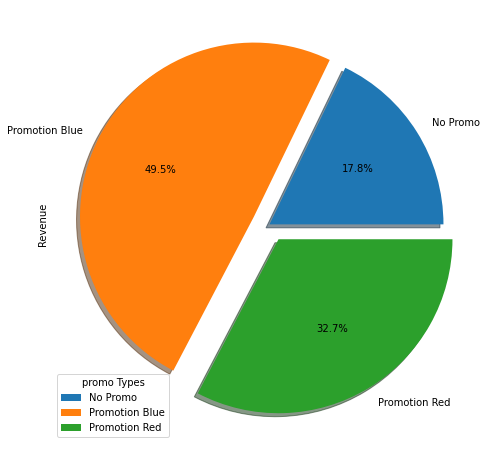

In [959]:
plt.subplots(figsize = (8,8))
markt_data.groupby('Promo')['Revenue'].mean().plot.pie(shadow = True,explode =[0.0,0.1,0.1],autopct ='%1.1f%%')
plt.legend(title = 'promo Types')
plt.show()

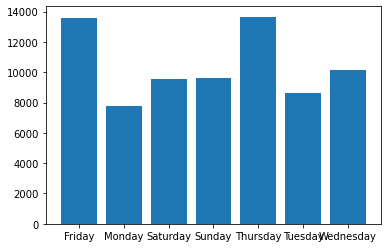

In [960]:
x=markt_data.groupby('Day_Name')['Revenue'].mean().to_frame().reset_index()
plt.bar(x['Day_Name'],x['Revenue'])
plt.show()

In [961]:
markt_data.groupby(['Promo'])['Marketing Spend'].sum()

Promo
No Promo          85622.955555
Promotion Blue    97925.296969
Promotion Red     64894.242173
Name: Marketing Spend, dtype: float64

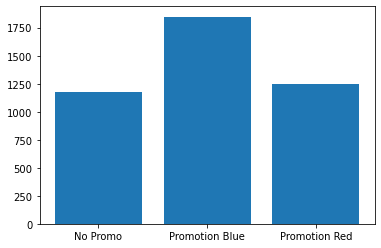

In [962]:
j=markt_data.groupby('Promo')['Marketing Spend'].mean().to_frame().reset_index()
plt.bar(j['Promo'],j['Marketing Spend'])
plt.show()

In [963]:
markt_data.groupby(['Day_Name','Promo'])['Revenue'].sum()

Day_Name   Promo         
Friday     No Promo           70138.0
           Promotion Blue    231970.0
           Promotion Red      50207.0
Monday     No Promo           43623.0
           Promotion Blue     46654.0
           Promotion Red      88111.0
Saturday   No Promo           52529.0
           Promotion Blue    131432.0
           Promotion Red      64331.0
Sunday     No Promo           45984.0
           Promotion Blue     99033.0
           Promotion Red      96279.0
Thursday   No Promo          118809.0
           Promotion Blue    157444.0
           Promotion Red      78995.0
Tuesday    No Promo           46076.0
           Promotion Blue     87287.0
           Promotion Red      91792.0
Wednesday  No Promo           55409.0
           Promotion Blue    101752.0
           Promotion Red     106007.0
Name: Revenue, dtype: float64

In [964]:
markt_data.groupby(['Month Number','Promo'])['Revenue'].sum()

Month Number  Promo         
1.0           No Promo           78158.0
              Promotion Blue    119977.0
              Promotion Red      99109.0
2.0           No Promo           70955.0
              Promotion Blue    161213.0
              Promotion Red      61134.0
3.0           No Promo           42474.0
              Promotion Blue    168709.0
              Promotion Red     116033.0
4.0           No Promo           45107.0
              Promotion Blue    171183.0
              Promotion Red      95654.0
5.0           No Promo           32319.0
              Promotion Red      36405.0
11.0          No Promo           54193.0
              Promotion Blue     73640.0
              Promotion Red      85509.0
12.0          No Promo          109362.0
              Promotion Blue    160850.0
              Promotion Red      81878.0
Name: Revenue, dtype: float64

In [965]:
markt_data.groupby(['Year','Promo'])['Revenue'].sum()

Year    Promo         
2020.0  No Promo          163555.0
        Promotion Blue    234490.0
        Promotion Red     167387.0
2021.0  No Promo          269013.0
        Promotion Blue    621082.0
        Promotion Red     408335.0
Name: Revenue, dtype: float64

## Machine Learning

In [966]:
## dealing with outliers

def d_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    outliers = df[((df<lower_limit) | (df>upper_limit))]
    
    df[df > upper_limit] = upper_limit
    df[df < lower_limit] = lower_limit
        
    return lower_limit,upper_limit,outliers 

In [967]:
display(d_outlier(markt_data['Revenue']),
d_outlier(markt_data.Visitors))

C:\Users\VIN\AppData\Local\Temp/ipykernel_11496/3357988916.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df > upper_limit] = upper_limit
C:\Users\VIN\AppData\Local\Temp/ipykernel_11496/3357988916.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df < lower_limit] = lower_limit


(-4615.5,
 23504.5,
 47     36283.0
 74     24417.0
 101    24247.0
 109    26608.0
 122    25704.0
 124    28196.0
 151    23870.0
 164    24506.0
 Name: Revenue, dtype: float64)

(276.5,
 3080.5,
 59    4139.0
 Name: Visitors, dtype: float64)

In [968]:
from sklearn.preprocessing import OneHotEncoder

In [969]:
encod= OneHotEncoder(handle_unknown = 'ignore')

In [970]:
encode =pd.DataFrame(encod.fit_transform(markt_data[['Day_Name','Promo']]).toarray())
encode

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
178,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [971]:
model_data = markt_data.join(encode)
model_data

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors,0,1,2,3,4,5,6,7,8,9
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250000,Promotion Red,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375000,Promotion Blue,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750000,No Promo,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500000,No Promo,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-05,60.0,5.0,17.0,2021.0,Wednesday,7284.0,1119.600000,No Promo,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
178,2021-05-06,60.0,5.0,17.0,2021.0,Thursday,13021.0,2067.888889,Promotion Red,2244.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
179,2021-05-07,60.0,5.0,17.0,2021.0,Friday,4587.0,NaN,No Promo,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875000,No Promo,1483.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [972]:
model_data.drop(['Day_Name','Promo','Week_ID','Date'], axis =1 , inplace = True)

In [973]:
display(model_data.head(), model_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month Number     182 non-null    float64
 1   Month_ID         182 non-null    float64
 2   Year             182 non-null    float64
 3   Revenue          178 non-null    float64
 4   Marketing Spend  178 non-null    float64
 5   Visitors         177 non-null    float64
 6   0                182 non-null    float64
 7   1                182 non-null    float64
 8   2                182 non-null    float64
 9   3                182 non-null    float64
 10  4                182 non-null    float64
 11  5                182 non-null    float64
 12  6                182 non-null    float64
 13  7                182 non-null    float64
 14  8                182 non-null    float64
 15  9                182 non-null    float64
dtypes: float64(16)
memory usage: 28.2 KB


,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,11.0,11.0,2020.0,465.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11.0,11.0,2020.0,10386.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,11.0,11.0,2020.0,12475.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,11.0,11.0,2020.0,11712.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,11.0,11.0,2020.0,10000.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


None

In [974]:
display(model_data.head(), model_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month Number     182 non-null    float64
 1   Month_ID         182 non-null    float64
 2   Year             182 non-null    float64
 3   Revenue          178 non-null    float64
 4   Marketing Spend  178 non-null    float64
 5   Visitors         177 non-null    float64
 6   0                182 non-null    float64
 7   1                182 non-null    float64
 8   2                182 non-null    float64
 9   3                182 non-null    float64
 10  4                182 non-null    float64
 11  5                182 non-null    float64
 12  6                182 non-null    float64
 13  7                182 non-null    float64
 14  8                182 non-null    float64
 15  9                182 non-null    float64
dtypes: float64(16)
memory usage: 28.2 KB


,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,11.0,11.0,2020.0,465.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11.0,11.0,2020.0,10386.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,11.0,11.0,2020.0,12475.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,11.0,11.0,2020.0,11712.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,11.0,11.0,2020.0,10000.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


None

In [975]:
dat_corr = model_data.corr()
dat_corr

,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
Month Number,1.000000,-0.601891,-0.965465,0.056311,0.116264,0.033913,-0.022469,0.011234,-0.018724,-0.018724,0.018724,0.014979,0.014979,-0.015801,0.001324,0.015667
Month_ID,-0.601891,1.000000,0.789160,-0.041908,-0.096467,-0.013159,0.007567,-0.018917,0.016395,0.016395,-0.001261,-0.010089,-0.010089,0.004216,-0.019173,0.014640
Year,-0.965465,0.789160,1.000000,-0.057075,-0.120995,-0.030383,0.019749,-0.014812,0.019749,0.019749,-0.014812,-0.014812,-0.014812,0.013528,-0.007273,-0.007273
Revenue,0.056311,-0.041908,-0.057075,1.000000,0.740480,0.578666,0.223141,-0.174804,-0.105767,-0.048130,0.232608,-0.121683,-0.014924,-0.647836,0.638687,0.061674
Marketing Spend,0.116264,-0.096467,-0.120995,0.740480,1.000000,0.845126,0.294848,-0.166547,-0.110966,-0.104548,0.356029,-0.209757,-0.051884,-0.267057,0.422957,-0.136457
Visitors,0.033913,-0.013159,-0.030383,0.578666,0.845126,1.000000,0.271550,-0.142530,-0.246251,-0.140727,0.483937,-0.190679,-0.036779,-0.066771,0.162134,-0.090681
0,-0.022469,0.007567,0.019749,0.223141,0.294848,0.271550,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,0.112941,-0.127672
1,0.011234,-0.018917,-0.014812,-0.174804,-0.166547,-0.142530,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,-0.093299,0.078567
2,-0.018724,0.016395,0.019749,-0.105767,-0.110966,-0.246251,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,0.009821,-0.024552
3,-0.018724,0.016395,0.019749,-0.048130,-0.104548,-0.140727,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.082199,0.044194,0.044194


<AxesSubplot:>

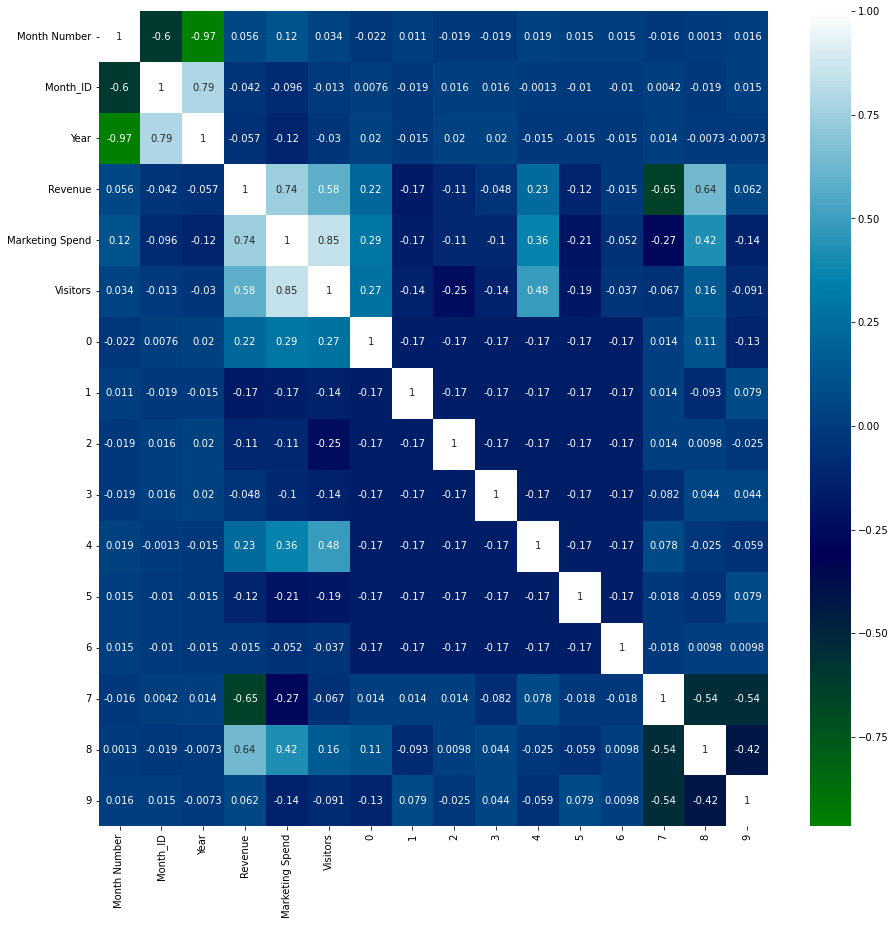

In [976]:
plt.figure(figsize=(15, 15))
sns.heatmap(dat_corr, cmap='ocean',annot=True)

In [977]:
x = model_data.drop('Revenue', axis=1)
y = model_data['Revenue']

In [978]:
display(x.shape, y.shape)

(182, 15)

(182,)

In [979]:
display(x.head(),y.head())

,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,11.0,11.0,2020.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11.0,11.0,2020.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,11.0,11.0,2020.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,11.0,11.0,2020.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,11.0,11.0,2020.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


0      465.0
1    10386.0
2    12475.0
3    11712.0
4    10000.0
Name: Revenue, dtype: float64

In [980]:
y.isnull().sum()

4

In [981]:
y.fillna(y.mean(),inplace = True)

In [982]:
y.isnull().sum()

0

In [983]:
x.head()

,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,11.0,11.0,2020.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11.0,11.0,2020.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,11.0,11.0,2020.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,11.0,11.0,2020.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,11.0,11.0,2020.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [984]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)

In [985]:
display(x_train.head(),x_test.head(),y_train.head(),y_test.head(),x_train.shape,x_test.shape,y_train.shape,y_test.shape)

,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
20,11.0,11.0,2020.0,1330.875000,1698.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
138,3.0,15.0,2021.0,868.888889,1437.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,12.0,12.0,2020.0,961.200000,1584.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,11.0,11.0,2020.0,2745.375000,2138.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
146,4.0,16.0,2021.0,754.500000,1406.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
168,4.0,16.0,2021.0,843.800000,1105.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,2.0,14.0,2021.0,829.111111,1464.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41,12.0,12.0,2020.0,1304.111111,1828.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.0,11.0,2020.0,2614.500000,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
173,5.0,17.0,2021.0,805.636364,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


20     10647.000000
138     3181.000000
28     10326.219101
13     14012.000000
146     6388.000000
Name: Revenue, dtype: float64

168     3884.0
104     5171.0
41      7655.0
4      10000.0
173     7445.0
Name: Revenue, dtype: float64

(127, 15)

(55, 15)

(127,)

(55,)

In [986]:
imputer = KNNImputer(n_neighbors=3)
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [987]:
x_train

array([[1.100e+01, 1.100e+01, 2.020e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.000e+00, 1.500e+01, 2.021e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+01, 1.200e+01, 2.020e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 1.300e+01, 2.021e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.000e+00, 1.500e+01, 2.021e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 1.400e+01, 2.021e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [988]:
x.head()

,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,11.0,11.0,2020.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11.0,11.0,2020.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,11.0,11.0,2020.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,11.0,11.0,2020.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,11.0,11.0,2020.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [989]:
cols = ['Month Number','Month_ID','Year','Marketing Spend','Visitors',0,1,2,3,4,5,6,7,8,9]

In [990]:
new_x = pd.DataFrame(x_train, columns= cols)

In [991]:
new_x.isna().sum()

Month Number       0
Month_ID           0
Year               0
Marketing Spend    0
Visitors           0
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
dtype: int64

In [992]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(new_x,y_train)
imp = pd.DataFrame(mutual_info_regression(new_x,y_train), index=new_x.columns)
imp.columns = ['Importance']
imp.sort_values(by = 'Importance', ascending = False)

,Importance
Marketing Spend,0.480271
Visitors,0.356074
7,0.346933
8,0.249746
9,0.195504
1,0.059800
0,0.045930
6,0.017941
3,0.015637
Year,0.015498


In [993]:
imp[imp['Importance']>0.02].sort_values(by='Importance', ascending= False)

,Importance
Marketing Spend,0.480271
Visitors,0.356074
7,0.346933
8,0.249746
9,0.195504
1,0.059800
0,0.045930


In [994]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [995]:
from sklearn.decomposition import PCA

In [996]:
pca=PCA(n_components=3)
pca.fit(x_train)
x_train=pca.transform(x_train)

pca2=pd.DataFrame(x_train,  columns=['PC1', 'PC2', 'PC3'])
pca2.head()


,PC1,PC2,PC3
0,1.714407,-2.101749,-1.395289
1,-1.934591,-0.087104,1.287931
2,1.138838,-2.584518,-0.668847
3,2.677798,-0.973981,-1.387559
4,-1.937216,-0.185533,0.466729


In [997]:
x_test=pca.transform(x_test)

In [998]:
x_train

array([[ 1.71440705, -2.1017485 , -1.39528867],
       [-1.9345912 , -0.08710402,  1.28793081],
       [ 1.13883765, -2.58451841, -0.66884698],
       [ 2.67779788, -0.97398113, -1.38755857],
       [-1.93721613, -0.18553333,  0.46672855],
       [ 2.13115913, -0.21828367,  2.56965538],
       [ 0.0150383 ,  1.53174197, -1.13802006],
       [-1.76206268, -0.84640702, -1.28902515],
       [-2.00898669, -0.52298229,  1.22399827],
       [-1.52350196, -0.67011659, -2.0704202 ],
       [ 1.01379861,  3.26862961,  0.07105884],
       [-0.27451929,  1.58190997,  1.47205328],
       [ 1.07040774, -2.38873462,  1.83052858],
       [ 2.19383655, -0.73381005,  1.23353705],
       [-1.6425476 , -0.39983976, -1.2459651 ],
       [ 0.23993437,  2.18662373, -0.60228673],
       [ 1.31354954, -1.72826206,  1.88654788],
       [ 1.41419793, -2.24490093, -0.64948047],
       [ 0.3662819 , -3.35716666,  1.68169195],
       [-1.46772498, -0.41588372, -2.00511111],
       [ 2.4923985 ,  0.26565799,  2.633

In [999]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [1000]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1001]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LR':
        model = LinearRegression()
    elif input_ml_algo == 'KNN':
        model = KNeighborsRegressor()
    return model


In [1002]:
# LINEAR REGRESSION MODEL
model_1= model_to_use('LR')
model_1

LinearRegression()

In [1003]:
model_1.fit(x_train,y_train)

LinearRegression()

In [1004]:
y_train_pred = model_1.predict(x_train) 
y_pred = model_1.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_train_pred))
print('Test r2 score: ', r2_score(y_test, y_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_train_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_train_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_pred))

Train r2 score :  0.7267510378584383
Test r2 score:  0.7814181736121161


Train Mean Score:  2272.2972632448314
Test Mean Score: 1728.39661665598


 Train Mean Sq Score 9434311.856522087
Test Mean Sq Score 5256666.58845838


In [1005]:
model_2= model_to_use('RF')
model_2

RandomForestRegressor()

In [1006]:
model_2.fit(x_train,y_train)

RandomForestRegressor()

In [1007]:
y_tr_rf_pred = model_2.predict(x_train) 
y_test_pred = model_2.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_rf_pred))
print('Test r2 score: ', r2_score(y_test, y_test_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_rf_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_rf_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_pred))

Train r2 score :  0.9655007584385689
Test r2 score:  0.8077063242638958


Train Mean Score:  766.3571901265151
Test Mean Score: 1711.9384310520943


 Train Mean Sq Score 1191135.7362646093
Test Mean Sq Score 4624463.78602434


In [1008]:
model_3= model_to_use('KNN')
model_3

KNeighborsRegressor()

In [1009]:
model_3.fit(x_train,y_train)

KNeighborsRegressor()

In [1010]:
y_tr_kn_pred = model_3.predict(x_train) 
y_tes_pred = model_3.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_kn_pred))
print('Test r2 score: ', r2_score(y_test, y_tes_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_kn_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_tes_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_kn_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_tes_pred))

Train r2 score :  0.8597398220461706
Test r2 score:  0.7633408225198917


Train Mean Score:  1613.4295762187028
Test Mean Score: 1963.528294177732


 Train Mean Sq Score 4842683.571409768
Test Mean Sq Score 5691408.163568556


In [1011]:
model_4= model_to_use('XGBC')
model_4

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [1012]:
model_4.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [1013]:
y_tr_xgb_pred = model_4.predict(x_train) 
y_test_preds = model_4.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_xgb_pred))
print('Test r2 score: ', r2_score(y_test, y_test_preds))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_xgb_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_preds))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_xgb_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_preds))

Train r2 score :  0.9999992981129437
Test r2 score:  0.7084537932436978


Train Mean Score:  3.5422930352552635
Test Mean Score: 2033.7103648792613


 Train Mean Sq Score 24.23365609408595
Test Mean Sq Score 7011384.383475819


In [1014]:
model_5= model_to_use('DT')
model_5

DecisionTreeRegressor()

In [1015]:
model_5.fit(x_train,y_train)

DecisionTreeRegressor()

In [1016]:
y_tr_dt_pred = model_5.predict(x_train) 
y_test_predi = model_5.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_dt_pred))
print('Test r2 score: ', r2_score(y_test, y_test_predi))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_dt_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_predi))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_dt_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_predi))

Train r2 score :  1.0
Test r2 score:  0.6379129739968259


Train Mean Score:  0.0
Test Mean Score: 2159.396016343207


 Train Mean Sq Score 0.0
Test Mean Sq Score 8707818.043058727


## Hyperparameter Tuning

In [1017]:
from sklearn.model_selection import GridSearchCV

In [1018]:
param_grid=({'n_jobs':[-1, 2, 4, 6, 8]},
           { 'n_jobs':[-1, 2, 4, 6, 8]})

grid_search=GridSearchCV(model_1, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search=grid_search.fit(x_train, y_train)

In [1019]:
grid_search.best_params_

{'n_jobs': -1}

In [1020]:
model_1=LinearRegression(n_jobs=-1,normalize=True)
model_1.fit(x_train, y_train)

C:\Users\VIN\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(n_jobs=-1, normalize=True)

In [1021]:
Linear_model = model_1.predict(x_train) 
Linear_y_pred= model_1.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,Linear_model))
print('Test r2 score: ', r2_score(y_test, Linear_y_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,Linear_model))
print('Test Mean Score:' , mean_absolute_error(y_test, Linear_y_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, Linear_model))
print('Test Mean Sq Score', mean_squared_error(y_test, Linear_y_pred))

Train r2 score :  0.7267510378584383
Test r2 score:  0.7814181736121162


Train Mean Score:  2272.2972632448314
Test Mean Score: 1728.3966166559796


 Train Mean Sq Score 9434311.856522087
Test Mean Sq Score 5256666.588458379


In [1022]:
#tune radom forest model
model_2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [1023]:
grid = ({'n_estimators':[4,6,8],'n_jobs':[6,8,10],'max_depth':[4,10,100]},
              {'n_estimators':[4,6,8],'n_jobs':[6,8,10],'max_depth':[4,10,100]})
grid_search = GridSearchCV(model_2,grid,cv = 5,scoring = 'r2',return_train_score = True)
grid_search = grid_search.fit(x_train,y_train)

In [1024]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 6, 'n_jobs': 8}

In [1025]:
model_2 = RandomForestRegressor(max_depth = 100,n_estimators = 8, n_jobs =10)
model_2.fit(x_train,y_train)

y_tr_rf_pred = model_2.predict(x_train) 
y_test_pred = model_2.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_rf_pred))
print('Test r2 score: ', r2_score(y_test, y_test_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_rf_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_rf_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_pred))

Train r2 score :  0.9498701397591834
Test r2 score:  0.7654053872853888


Train Mean Score:  867.1085441918075
Test Mean Score: 1849.2147727272727


 Train Mean Sq Score 1730805.2375720094
Test Mean Sq Score 5641757.518765


In [1026]:
import pickle
from pickle import dump

In [1027]:
#save the model
dump(model_1,open('LR.pkl','wb'))

dump(encode,open('enc.pkl','wb'))

dump(imputer,open('imput.pkl','wb'))

dump(scaler,open('scaler.pkl','wb'))

dump(pca, open('pca.pkl', 'wb'))

In [1028]:
my_model= pickle.load(open('LR.pkl','rb'))
enc = pickle.load(open('enc.pkl','rb'))
inputer = pickle.load(open('imput.pkl','rb'))
scal = pickle.load(open('scaler.pkl','rb'))
pc = pickle.load(open('pca.pkl', 'rb'))

In [1029]:
def predict(k):
    my_model=pickle.load(open('LR.pkl','rb'))
    scaler=pickle.load(open('scaler.pkl', 'rb'))
    enc=pickle.load(open('enc.pkl', 'rb'))
    imputer=pickle.load(open('imput.pkl', 'rb'))
    pca=pickle.load(open('pca.pkl', 'rb'))
    
    
    encoded=pd.DataFrame(encod.transform(k[['Day_Name', 'Promo']]).toarray())
    new=k.join(encoded)
    new.drop(['Day_Name', 'Promo','Week_ID'], axis=1, inplace=True)
    new=imputer.transform(new)
    new=scaler.transform(new)
    new=pca.transform(new)
    result=my_model.predict(new)
    print(f' The Expected Revenue is {round(result.sum(), 2)}')
    

In [1030]:
column= ['Week_ID','Month Number','Month_ID','Year','Day_Name','Marketing Spend','Promo','Visitors']

In [1031]:
new =pd.DataFrame([[np.NAN,np.NAN,np.NAN,np.NAN,'Thursday',5000,'Promotion Red',np.NAN]],columns = column)
new

,Week_ID,Month Number,Month_ID,Year,Day_Name,Marketing Spend,Promo,Visitors
0,NaN,NaN,NaN,NaN,Thursday,5000,Promotion Red,NaN


In [1032]:
predict(new)

 The Expected Revenue is 19809.1


C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [1033]:
modelpred= markt_data.copy()
modelpred = modelpred.drop(['Revenue','Date'],axis = 1)

In [1034]:
modelpred['Promo']='Promotion Blue'

In [1035]:
predict(modelpred)

 The Expected Revenue is 2487295.95


C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [1036]:
markt_data['Revenue'].sum()

1838067.0